<a href="https://colab.research.google.com/github/AllanKamimura/AI/blob/master/Minicursos/Image_and_Text_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Init

In [ ]:
!pip -q install tensorflow_text

# bibliotecas basicas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#bibliotecas importantes 
import tensorflow as tf
import tensorflow_text as tftext
import tensorflow_hub as tfhub

from tensorflow.keras.preprocessing.image import ImageDataGenerator

#bibliotecas que ajudam a montar
from google.colab import files
from google_drive_downloader import GoogleDriveDownloader

     |████████████████████████████████| 4.3MB 8.8MB/s 


In [ ]:
# baixando as imagens do meu google drive
file_id = "14eTab9-EJV5noauL_jla7Htw984nceOz" # id do arquivo
folder = "animal" # nome do folder principal dentro do zip

GoogleDriveDownloader.download_file_from_google_drive(
    file_id = file_id,
    dest_path = "/content/animal.zip",
    unzip = True
)


Unzipping...Done.


In [ ]:
# baixando as reviews do meu github
!wget https://raw.githubusercontent.com/AllanKamimura/AI/master/text/classification/tripadvisor_hotel_reviews.csv

--2021-07-10 00:26:34--  https://raw.githubusercontent.com/AllanKamimura/AI/master/text/classification/tripadvisor_hotel_reviews.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.111.133, 185.199.109.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 14966021 (14M) [text/plain]
Saving to: ‘tripadvisor_hotel_reviews.csv’

tripadvisor_hotel_r 100%[===================>]  14.27M  45.0MB/s    in 0.3s    

2021-07-10 00:26:35 (45.0 MB/s) - ‘tripadvisor_hotel_reviews.csv’ saved [14966021/14966021]



# Convoluções

In [ ]:
# from https://www.kaggle.com/alessiocorrado99/animals10
datagen = ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.1
)

train_images = datagen.flow_from_directory(
    directory = "/content/animal",
    subset = "training",
    seed = 1
)

val_images = datagen.flow_from_directory(
    directory = "/content/animal",
    subset = "validation",
    seed = 1
) 


Found 23561 images belonging to 10 classes.
Found 2613 images belonging to 10 classes.


In [ ]:
images, labels = val_images.next()

In [ ]:
images.shape

(32, 256, 256, 3)

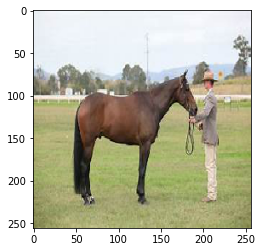

In [ ]:
image = images[0]
_ = plt.imshow(image)

In [ ]:
labels.shape

(32, 10)

In [ ]:
label = labels[0]
label

array([0., 1., 0., 0., 0., 0., 0., 0., 0., 0.], dtype=float32)

In [ ]:
np.argmax(label)

1

In [ ]:
val_images.class_indices

{'cane': 0,
 'cavallo': 1,
 'elefante': 2,
 'farfalla': 3,
 'gallina': 4,
 'gatto': 5,
 'mucca': 6,
 'pecora': 7,
 'ragno': 8,
 'scoiattolo': 9}

In [ ]:
def my_model():
    input = tf.keras.layers.Input(shape = (256,256,3))

    x = tf.keras.layers.Conv2D(filters = 16, kernel_size = 3,
                               activation = "relu")(input)
    x = tf.keras.layers.MaxPooling2D()(x)

    x = tf.keras.layers.Conv2D(filters = 32, kernel_size = 3,
                               activation = "relu")(x)
    x = tf.keras.layers.MaxPooling2D()(x)

    x = tf.keras.layers.Conv2D(filters = 64, kernel_size = 3,
                               activation = "relu")(x)
    x = tf.keras.layers.MaxPooling2D()(x)

    x = tf.keras.layers.Conv2D(filters = 128, kernel_size = 3,
                               activation = "relu")(x)
    x = tf.keras.layers.MaxPooling2D()(x)

    x = tf.keras.layers.Flatten()(x)

    x = tf.keras.layers.Dense(units = 128, activation = "relu")(x)
    x = tf.keras.layers.Dense(units = 64, activation = "relu")(x)
    x = tf.keras.layers.Dense(units = 32, activation = "relu")(x)
    y = tf.keras.layers.Dense(units = 10, activation = "softmax")(x)

    model = tf.keras.models.Model(
        inputs = input,
        outputs = y
    )

    return model

In [ ]:
model1 = my_model()
model1.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
conv2d (Conv2D)              (None, 254, 254, 16)      448       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 127, 127, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 125, 125, 32)      4640      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 62, 62, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 60, 60, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 30, 30, 64)        0     

In [ ]:
model1.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = "accuracy"
)

In [ ]:
model1.fit(
    x = train_images,
    validation_data = val_images,
    epochs = 5
)

Epoch 1/5
737/737 [==============================] - 111s 108ms/step - loss: 1.8217 - accuracy: 0.3598 - val_loss: 1.5249 - val_accuracy: 0.4703
Epoch 2/5
737/737 [==============================] - 78s 106ms/step - loss: 1.3109 - accuracy: 0.5498 - val_loss: 1.2179 - val_accuracy: 0.5809
Epoch 3/5
737/737 [==============================] - 77s 105ms/step - loss: 1.0315 - accuracy: 0.6496 - val_loss: 1.1192 - val_accuracy: 0.6246
Epoch 4/5
737/737 [==============================] - 77s 104ms/step - loss: 0.8038 - accuracy: 0.7290 - val_loss: 1.0384 - val_accuracy: 0.6491
Epoch 5/5
737/737 [==============================] - 77s 105ms/step - loss: 0.5954 - accuracy: 0.7999 - val_loss: 1.1417 - val_accuracy: 0.6628


In [ ]:
predicts = model1.predict(images)

In [ ]:
predict = predicts[0]

In [ ]:
np.argmax(predict)

1

# Transfer Learning

In [ ]:
datagen2 = ImageDataGenerator(
    rescale = 1/255,
    validation_split = 0.1,
    preprocessing_function = tf.keras.applications.vgg16.preprocess_input
)

train_images2 = datagen2.flow_from_directory(
    directory = "/content/animal",
    subset = "training",
    seed = 1
)

val_images2 = datagen2.flow_from_directory(
    directory = "/content/animal",
    subset = "validation",
    seed = 1
) 


Found 23561 images belonging to 10 classes.
Found 2613 images belonging to 10 classes.


In [ ]:
# from https://arxiv.org/abs/1409.1556
vgg16 = tf.keras.applications.VGG16(include_top = False,
                                    input_shape = (256,256,3))

58892288/58889256 [==============================] - 0s 0us/step


In [ ]:
vgg16.trainable = False
vgg16.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 256, 256, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 256, 256, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 256, 256, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 128, 128, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 128, 128, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 128, 128, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 64, 64, 128)       0     

In [ ]:
model2 = tf.keras.Sequential(
    [vgg16,
     tf.keras.layers.Flatten(),
     tf.keras.layers.Dense(128, activation = "relu"),
     tf.keras.layers.Dense(32, activation = "relu"),
     tf.keras.layers.Dense(units = 10, activation = "softmax")
        ])
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 8, 8, 512)         14714688  
_________________________________________________________________
flatten_1 (Flatten)          (None, 32768)             0         
_________________________________________________________________
dense_7 (Dense)              (None, 128)               4194432   
_________________________________________________________________
dense_8 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_9 (Dense)              (None, 10)                330       
Total params: 18,913,578
Trainable params: 4,198,890
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
model2.compile(
    loss = tf.keras.losses.CategoricalCrossentropy(),
    optimizer = tf.keras.optimizers.Adam(),
    metrics = "accuracy"
)

In [ ]:
model2.fit(
    x = train_images2,
    validation_data = val_images2,
    epochs = 1
)

737/737 [==============================] - 178s 229ms/step - loss: 0.6321 - accuracy: 0.7977 - val_loss: 0.3852 - val_accuracy: 0.8775


# Text

## modelo pre-treinado
https://tfhub.dev

In [ ]:
# from https://www.kaggle.com/andrewmvd/trip-advisor-hotel-reviews
df = pd.read_csv("/content/tripadvisor_hotel_reviews.csv")
df.head()

,Review,Rating
0,nice hotel expensive parking got good deal sta...,4
1,ok nothing special charge diamond member hilto...,2
2,nice rooms not 4* experience hotel monaco seat...,3
3,"unique, great stay, wonderful time hotel monac...",5
4,"great stay great stay, went seahawk game aweso...",5


In [ ]:
pd.get_dummies(df.Rating)

,1,2,3,4,5
0,0,0,0,1,0
1,0,1,0,0,0
2,0,0,1,0,0
3,0,0,0,0,1
4,0,0,0,0,1
...,...,...,...,...,...
20486,0,0,0,0,1
20487,0,0,0,1,0
20488,0,1,0,0,0
20489,1,0,0,0,0


In [ ]:
def my_model3():
    text_input = tf.keras.layers.Input(shape=(), dtype=tf.string)
    preprocessor = tfhub.KerasLayer(
        "https://tfhub.dev/tensorflow/bert_en_uncased_preprocess/3")
    encoder_inputs = preprocessor(text_input)
    encoder = tfhub.KerasLayer(
        "https://tfhub.dev/tensorflow/small_bert/bert_en_uncased_L-8_H-128_A-2/2",
        trainable = False)
    outputs = encoder(encoder_inputs)
    pooled_output = outputs["pooled_output"]      # [batch_size, 128].

    x = tf.keras.layers.Dense(32, activation = "relu")(pooled_output)
    y = tf.keras.layers.Dense(5, activation = "softmax")(x)

    model = tf.keras.models.Model(
        inputs = text_input,
        outputs = y
    )

    return model


In [ ]:
model3 = my_model3()
model3.summary()

Model: "model_2"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None,)]            0                                            
__________________________________________________________________________________________________
keras_layer_4 (KerasLayer)      {'input_word_ids': ( 0           input_3[0][0]                    
__________________________________________________________________________________________________
keras_layer_5 (KerasLayer)      {'pooled_output': (N 5575553     keras_layer_4[0][0]              
                                                                 keras_layer_4[0][1]              
                                                                 keras_layer_4[0][2]              
____________________________________________________________________________________________

In [ ]:
model3.compile(
    optimizer = tf.keras.optimizers.Adam(learning_rate =  0.0001),
    loss = tf.keras.losses.CategoricalCrossentropy(),
    metrics = "accuracy"
)

In [ ]:
model3.fit(x = df.Review, y = pd.get_dummies(df.Rating), epochs = 5)

Epoch 1/5
641/641 [==============================] - 55s 77ms/step - loss: 1.3312 - accuracy: 0.4318
Epoch 2/5
641/641 [==============================] - 49s 77ms/step - loss: 1.2405 - accuracy: 0.4647
Epoch 3/5
641/641 [==============================] - 49s 77ms/step - loss: 1.2053 - accuracy: 0.4798
Epoch 4/5
641/641 [==============================] - 49s 77ms/step - loss: 1.1848 - accuracy: 0.4885
Epoch 5/5
641/641 [==============================] - 49s 77ms/step - loss: 1.1702 - accuracy: 0.4934


In [ ]:
predict = model3.predict(["this hotel is perfect"])

In [ ]:
predict

array([[0.113783  , 0.04872115, 0.1717643 , 0.15685742, 0.5088741 ]],
      dtype=float32)

In [ ]:
print((tf.argmax(predict.squeeze()).numpy() + 1) * "★")

★★★★★


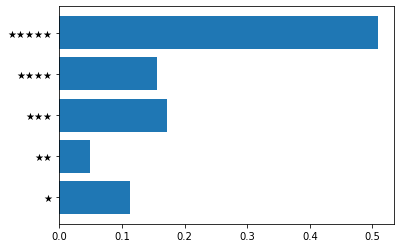

In [ ]:
_ = plt.barh(["★" * (i + 1) for i in range(5)], predict.squeeze())

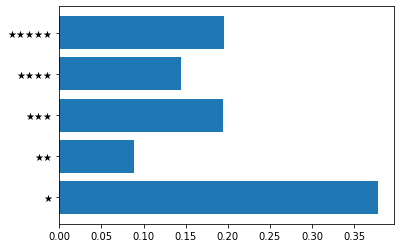

In [ ]:
predict = model3.predict(["this hotel is shit"])
_ = plt.barh(["★" * (i + 1) for i in range(5)], predict.squeeze())


In [ ]:
model3.predict(["china did the covid19"])

In [ ]:
model3.predict(["this hotel is perfect"])

In [ ]:
model3.predict(["trivago"])

In [ ]:
print((tf.argmax(predict.squeeze()).numpy() + 1) * "★")

# Extra

## Food Dataset

In [ ]:
# from https://www.kaggle.com/kmader/food41
file_id = "1VB8AeJFJ0ylbJDmi61dNbwpa50u33z5Q"
folder = "newer_food"

GoogleDriveDownloader.download_file_from_google_drive(
    file_id = file_id,
    dest_path = "/content/newer_food.zip",
    unzip = True
)

## Pokemon Dataset

In [ ]:
# from https://www.kaggle.com/thedagger/pokemon-generation-one
file_id = "1lKfmEjyovEvvZ2zBUkdJwl2fnF4C5OyM" # pokemon dataset id

# download data
GoogleDriveDownloader.download_file_from_google_drive(
    file_id = file_id,
    dest_path = "/content/pokemon.zip",
    unzip = True
)
